If you have not installed scikit-learn so far:<br>
Anaconda users: **conda install scikit-learn=0.20.0**<br>
Others: **pip install scikit-learn=0.20.0**<br>
*Please use the suggested version to avoid any related issues, once you finish the course, you can always try other versions, they are not very different* <br>
**Thanks**


# Linear Regression with Python using Scikit-Learn

Hi guys,<br>

Very warm welcome to the Linear Regression with python using scikit-learn lecture. In the theory lecture, we have leaned the key concepts and working principle behind the Linear Regression (Supervised Machine Learning) model. Its time to learn by doing.<br>

&#9989;** I am very excited because you have put tremendous amount efforts to come to this stage, where we are doing our first Machine Learning project. We will go through the process step-by-step. It is important, so that we understand the next lectures without going through these steps in details. However, we will revise these steps, several times, along our way in the machine learning section. ** 

Let's start with a very famous and real dataset. Our task is to built a machine learning model to predict the housing price in Boston area. This housing dataset is a part of scikit-learn and also available on kaggle for you to download. A .csv file is also included in the course material. 
[Boston Housing Dataset on kaggle](https://www.kaggle.com/heptapod/uci-ml-datasets/data). Let's use use the one which is already included in the scikit-learn dataset repository, so that, you get to know the process to load the built-in datasets from scikit-learn as well.  

**Let's start by creating a real life situation!**
You are hired by a real estate company to help them in their business goals. The company wants you to predict the housing prices in Boston area. Based on the community and safety issues, some areas are in demand. The company is interested in some kind of automated way of suggesting the price of a house based on its features.<br>

You are given a dataset that contain features such as crime rate by town, proportion of residential land, nitric oxide concentration, age of the house, property tax so on.... <br>

You are happy to help because you got a job to do!<br>

Now, when you look at the dataset, you think that the linear regression is a good model to work with in this type of problem. <br>

You have the data, lets start working on the model!<br>



Details of the full list of features is given below:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per USD 10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000's


### Let's import the libraries we need

We are already familiar with these ones!

In [1]:
# We are already familiar with these ones!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Related to scikit learn, Python machine learning module 
# to work with the built-in datasets
from sklearn import datasets 

**Let's load the built-in housing price dataset, "boston" into "bh"**

In [3]:
bh = datasets.load_boston()

In [4]:
type(bh)

sklearn.utils.Bunch

**boston dataset is essentially a dictionary, let's check its keys**

In [5]:
bh.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
for k, v in bh.items():
    print(k, v)

data [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
target [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 2

**So, it contain data, target which is the price, feature_names are the columns and DESCR is the description on the data**

In [7]:
#print(bh.DESCR)
print(bh['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**Let's create a pandas dataframe with features as column's name and also add target as another column, price.** 

In [9]:
df=pd.DataFrame(data=bh.data,columns=bh.feature_names)
df['price']=bh.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's get some information on the data, using info()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Let's have a quick view on some of the statistical information of our dataset 

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Let's do some Exploratory Data Analysis (EDA)
**It is very important to know the data, let's see how the data look like.**<br>
Let's see how the price is distributed!

Text(0, 0.5, 'count')

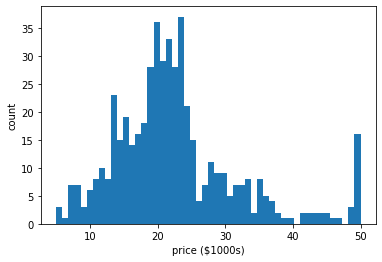

In [12]:
# Housing price (target) histogram 
#plt.figure(figsize=(4, 3))
plt.hist(df['price'], bins=50)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
#plt.tight_layout()

So, in we look at the histogram, most of the prices are in 20's. We notice that, the average price is around ~ 22K. There are some houses in 50's as well. <br>If you want, you can drop these rows where the price is in 50's, at the moment, we are keeping all the data <br><br><br>
**saborn's pairplot function is a good option to explore little more.** <br>
&#9758; Although, we can plot all the feature but the pairplot would be very crowded. Let's plot some important features to see how they are related to each other!<br>

We can check how the `Crime rate (CRIM)`, `No. of rooms (RM)`,`Age of the house (AGE)` , `% lower status of the population (LSTAT)`, ` weighted distances to five Boston employment centres (DIS)` and `price` are related to each other!

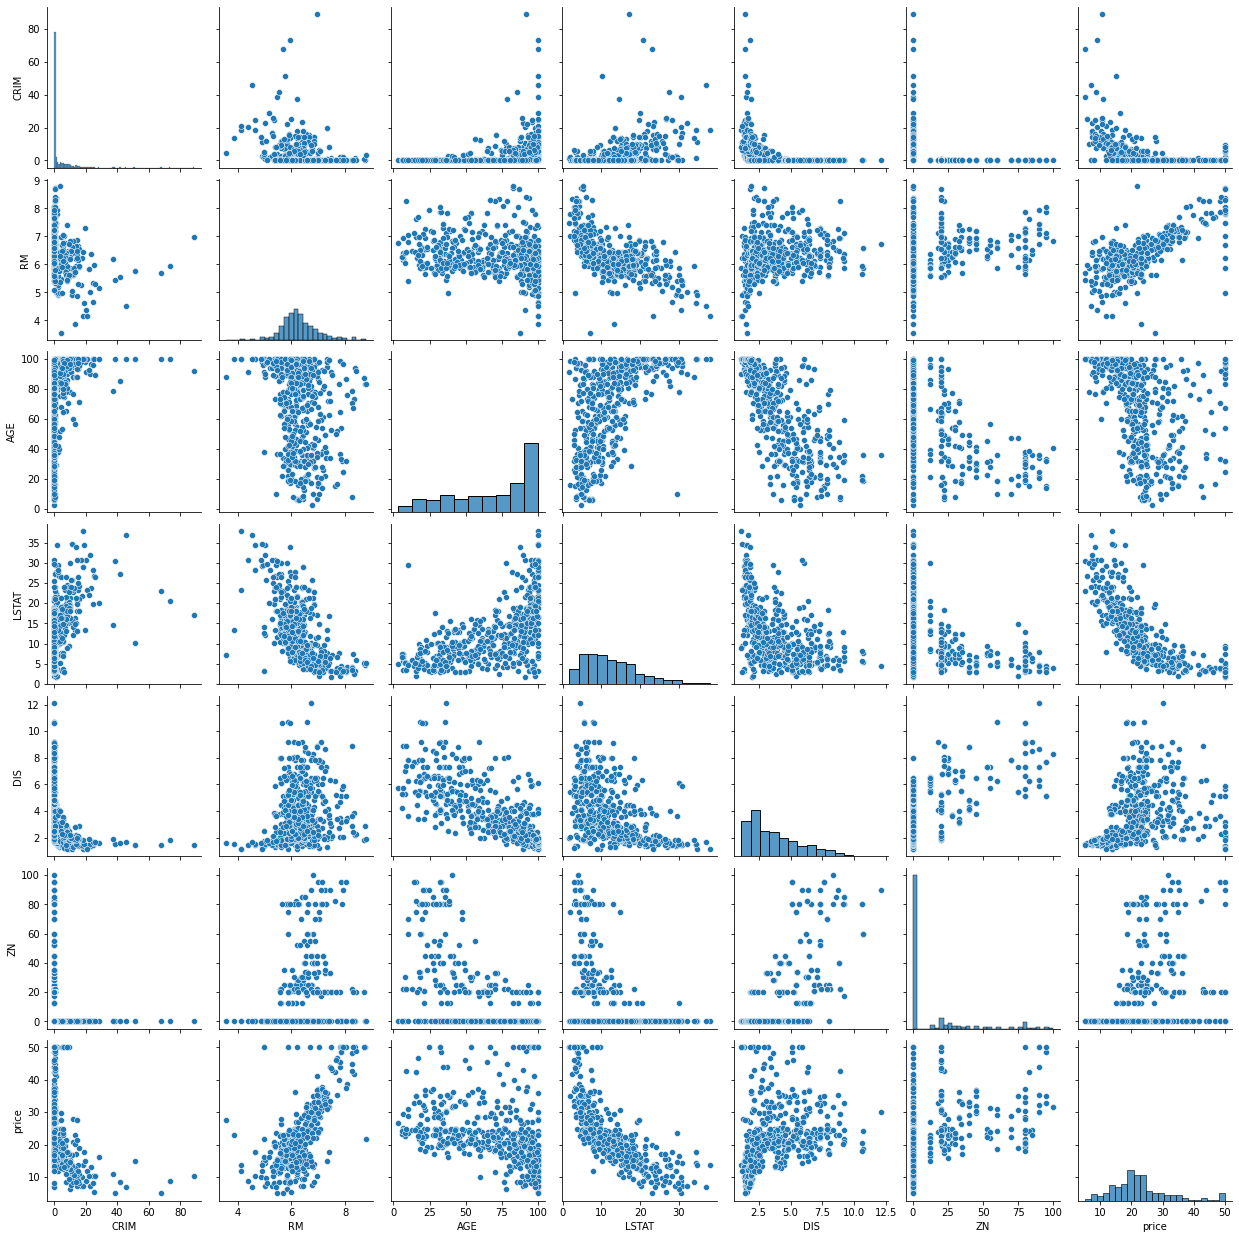

In [13]:
# Crime, No of rooms, Age of the house, Price
sns.pairplot(df[['CRIM','RM','AGE','LSTAT','DIS','ZN','price']]) 
#sns.pairplot(df) # in case you want to plot whole dataset!

If we give a quick look on the last row, price vs selected features, we see some trends. Let's see how the heatmap looks like for the selected features!<br><br><br>
### Let's see how the correlation between selected features looks like using heatmap!<br>

In [ ]:
# Let's plot correlation for the whole dataframe 
#df.corr()
#sns.heatmap(df.corr())

<AxesSubplot:>

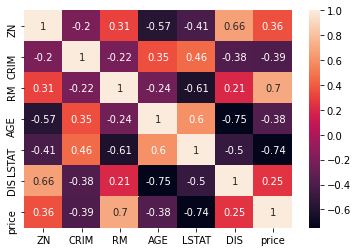

In [14]:
sns.heatmap(df[['ZN','CRIM','RM','AGE','LSTAT','DIS','price']].corr()
            , annot=True)

So, every column is perfectly correlated to itself along the diagonal!
we can see +ve and -ve correlation between price and other features. No of rooms have the highest value for price, that make sense, more the rooms are, higher the price is where as older the house is, lower the price you can expect!<br><br><br>
**You can spend more time on EDA, get more plots and see how much information you can get from your dataset. Our focus in this lecture is machine learning model and we will not spend more time on EDA. <br>**

Let's create a model to suggest the house price based on the selected features. 

**Let's move on the Machine Learning now using scikit-learn!**<br>
The first thing is to separate the data into:<br>
* X that will contain the selected features
* y will be the target values, in this case price of the house.

### X and y arrays
We are only using the selected feature, so need to pass the column names.<br>
&#9758; *I suggest, repeat the same model using all features once we are done with this lecture, that would be a good practice and you can also compare the results!*

In [15]:
X = df[['ZN','CRIM','RM','AGE','LSTAT','DIS']]
y = df['price']

# Linear Regression Model Training
Excited!<br>
Time to create/train our model!<br>

### Train Test Split 
Now we have features in X and target (price) in y. <br>
Next step is to split the data into a training set (`X_train` & `y_train`) and a testing set (`X_test` & `y_test`). <br>
We will train our model on the training dataset in `X_train` & `y_train` and then use the test dataset `X_test` & `y_test` to evaluate the model.<br>
`Scikit-learn` already has a method `train_test_split`, let's import this built-in method and do the split.<br>
We will pass our `test train data` to `train_test_split` and tell the `test_size`, which is the % of the dataset that we want in the `test data`. <br>
&#9758; Shift+Tab and copy paste train-test split!<br>
Let's leave the standard `test_size = 0.33` and `random_state = 42` at the moment. 
* *For the same data, the random_state = some number will make sure that you are getting same split if you pass the same number. if you pass the same number as mine, you will get the same results for the same data. If you pass a different random_state, you may not get the same results but it does not mean your results are not correct! This [stackflow](https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn) may help to understand more on the randon_state* 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [17]:
# let's check the head of X_train, just for a quick look
X_train.head()

,ZN,CRIM,RM,AGE,LSTAT,DIS
178,0.0,0.06642,6.860,74.4,6.92,2.9153
447,0.0,9.92485,6.251,96.6,16.44,2.1980
445,0.0,10.67180,6.459,94.8,23.98,1.9879
359,0.0,4.26131,6.112,81.3,12.67,2.5091
281,20.0,0.03705,6.968,37.2,4.59,5.2447


## Creating and Training the Model
**OK!<br>
Now we have `train (X_train, y_train)` and `test (X_test, y_test)datasets`, Let's create the model.**<br>

First thing first, we need linear regression model to train on our dataset! right?.<br> 

It's easy, let's import `linear_model` family from the `sklearn` so that we can use its member `LinearRegression` for our data. <br> <br>


*<font style="font-size:14px;color:green;"> We can use `from sklearn.linear_model import LinearRegression` as well and than use `lm = LinearRegression()`</font>*

In [18]:
#LinearRegression model is a part of linear_model
from sklearn import linear_model

Let's create an instance for the LinerRegression model

In [19]:
lm = linear_model.LinearRegression()

We have create an instance `lm` (LinearRegression object) to use. <br>
If you write `lm.` and press tab in the code cell, you will find the available options, we want to use `fit()` at the moment to train the model.

Training the model on our train dataset

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

&#9758; We got the output above, our `LinearRegression` model has been trained on the provided data to the model!<br>

## Model Evaluation
Our model is trained, we need to evaluate our model. Let's evaluate the model by checking it's coefficients and how we can interpret them.

In [21]:
# print the intercept
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0.
print(lm.intercept_)

11.287823727868393


Coefficients relates each feature in the dataset, each feature will have a separate coefficient!<br>

In [22]:
# Let's grab the coefficients from our model 
lm.coef_

array([ 0.06266351, -0.12634129,  3.85449278, -0.00772815, -0.69962672,
       -1.07242786])

**Optional**<br>
We can create a dataframe using columns from `X` as `index` and values of the coefficients in a new column `'Coefficient'`. Its organized and look better!

In [23]:
# Our columns are
X.columns
#X_train.columns

Index(['ZN', 'CRIM', 'RM', 'AGE', 'LSTAT', 'DIS'], dtype='object')

In [24]:
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs

,Coefficient
ZN,0.062664
CRIM,-0.126341
RM,3.854493
AGE,-0.007728
LSTAT,-0.699627
DIS,-1.072428


**Let's discuss coefficients briefly.**<br>
Let's take RM = 3.839684:<br>
* This suggest, if we keep all other coefficients constant, a one unit increase in the RM is associated with an increase of 3.839684 in the price. <br>
* The same is for other related coefficients. e.g. the Crime rate, age etc decreases the price according to their coefficients, keeping all other constants.  <br>

If you want further detail and mathematics behind this, please read the suggested reading assignments!

## Predictions from our Model
We have trained our model, discussed the coefficients which make some sense, now, its important to know how well the model is doing!<br>

Our model have never seen `X_test`, let's provide test data "`X_test`" to our created model and see what the predictions are. Once we get the predictions from the model, we can compare them with what we have in our `y_test`. <br>

In [25]:
# Getting predictions from the model 
predictions = lm.predict(X_test)
#predictions

We already know the price of all homes with features in `X_test`, which is in `y_test`, let's plot `y_test` and predictions, scatter plot is a good option!

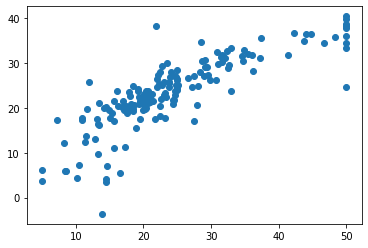

In [26]:
plt.scatter(y_test,predictions)

Residual Histogram can tell us how much the predicted value differ from the actual value in `y_test`. We can simple do the subtraction `y_test - predictions` for this plot.

<AxesSubplot:xlabel='price', ylabel='Density'>

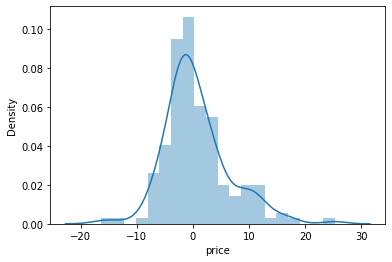

In [27]:
#Residual Histogram
sns.distplot(y_test-predictions)#,bins=30);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems. All of these are **loss functions**, because we want to minimize them.<br>

*Consider, ${y}$ is a vector of `n` predictions generated from a sample of `n` data points on all variables, and 
$\hat{y}$ is the vector of observed values (target values) of the variable being predicted.<br>*

**[Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)** (MAE) is the mean of the absolute value of the errors: <br>
it's the average error!

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i  |$$

**[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)** (MSE) is the mean of the squared errors:<br>
**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**[Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)** (RMSE) is the square root of the mean of the squared errors:<br>
**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units. <br><br>The root-mean-squared error (**RMSE**) **or** root-mean-square deviation (**RMSD**), is a frequently used measure of the differences between values predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
<br><br><br>
Let's calculate MAE, MSE and RMSE for our model. <br>We need to pass the y_test and predictions to the respective method!<br>

We need to do another import here!

In [28]:
#Regression Evaluation Metrics
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.180750697077353
MSE: 34.08352194479759
RMSE: 5.838109449539088


# Excellent !
We are done with our very first Machine Learning project using `LinearRegression` model. <br>
**Good to do:**<br>
* Repeat the model using all features in the 'Boston housing dataset' and compare the difference with the results in this notebook.
* Repeat this model for another dataset `kc_house_data.csv` (provided in the material). This is another real dataset on house sales in King County, USA. 

Let's move on to the exercise project in which we will find out the quality of the wine based on different aspects!

<br><br><br>
## Good to know
#### You may want to save your model for delivery to your client so that they can deploy accordingly. Its easy!

In [ ]:
import pickle 

In [ ]:
# save the model to disk
filename = 'final_model.sav'

# lm is our model, see above!
# file will be stored on the disk, see the working directory
pickle.dump(lm, open(filename, 'wb')) # wb is stands for writing only in binary format
#pickle.dump(lm, open('final_model.sav', 'wb')) # one line if you are interested!

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) # rb stands for reading only in binary format

In [ ]:
# let's do predictions using stored model after loading
predictions = loaded_model.predict(X_test)

#scatter plot
plt.scatter(y_test,predictions)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

So, you got the same plot and same values, see above in cell 25 and 28. Now your model `**("final_model.sav")**`is ready to deliver to your client. 

## A common question on error!
**Indeed, we want to minimize the error and the best value is 0.0 (when the line is passing exactly through all the data points -- recall the lecture notes). However, it is not realistic.**

Think about some situation:

You have high variance and your target values are spread over, say b/w 0 and 1000.

Your got situation where you have **some outliers with extreme values** (only very few data points with a value above 1000 and all other are b/w 0 and 100)

**You got a nice dataset (usually you get after data cleaning -- domain knowledge is important) which is a good representative with acceptable bias and variance (recall bias-variance trade-off lecture)**

Let's try to understand this with a very simple example:

You have:

**`target`** = `[ 4, 2, 3, 4, 10, 4, 6 ]` <br> **`predictions`** = `[ 1, 3, 4, 2, 6, 5, 2 ]`

**`MAE`**: 2.2857 <br> **`MSE`**: 6.8571

**Now, let's replace <font style="color:green;">6</font> with <font style="color:red;">1000 -- outlier -- </font>in your targets:**

**`target`**  = [ 4, 2, 3, 4, 10, 4, <font style="color:red;">**1000**</font> ] <br>
**`predictions`** = [ 1, 3, 4, 2, 6, 5, 2 ]

**`MAE`**: 144.285 <br>
**`MSE`**: <font style="color:red;">**142290.857**</font>

(You can calculate MAE and MSE the same way we did in the linear regression section -- above)

You have an <font style="color:red;">outlier "1000"</font>, you need to deal with that so that you can get a generalized model. <br>
Indeed, the **error based metrics like MAE, MSE, RMSE ...., provides an estimate on the prediction quality. However, deciding on a threshold value for these metrics is tricky. For example, you can have higher value due to a small number of outliers (high error predictions)**. 

I hope you got the intuition. Good Luck!